**1. Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


**2: Load and Explore the Dataset**

Let's load the dataset and take a quick look at its structure to understand the features and their types.


In [2]:
data = pd.read_csv('/content/Housing.csv')

# Display the first few rows
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


**3: Preprocess the Data**

#### Key Steps:
1. **Handle Categorical Variables**:
   - Convert binary categorical features ('Yes'/'No') into 0/1.
   - Convert the 'furnishingstatus' column into numeric values using one-hot encoding.
2. **Split Dataset**:
   - Separate features (X) and target (y).
   - Split into training and testing sets.
3. **Normalize Features**:
   - Use `StandardScaler` to normalize the numerical features.


In [3]:
print(data.columns)


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [4]:
# Encode binary categorical variables
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    data[col] = data[col].map({'yes': 1, 'no': 0})

# Label encode 'furnishingstatus' into 0, 1, 2
label_encoder = LabelEncoder()
data['furnishingstatus'] = label_encoder.fit_transform(data['furnishingstatus'])

# Split into features (X) and target (y)
X = data.drop(columns=['price'])  # Features
y = data['price']                # Target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


In [5]:
data.shape

(545, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [7]:
data.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


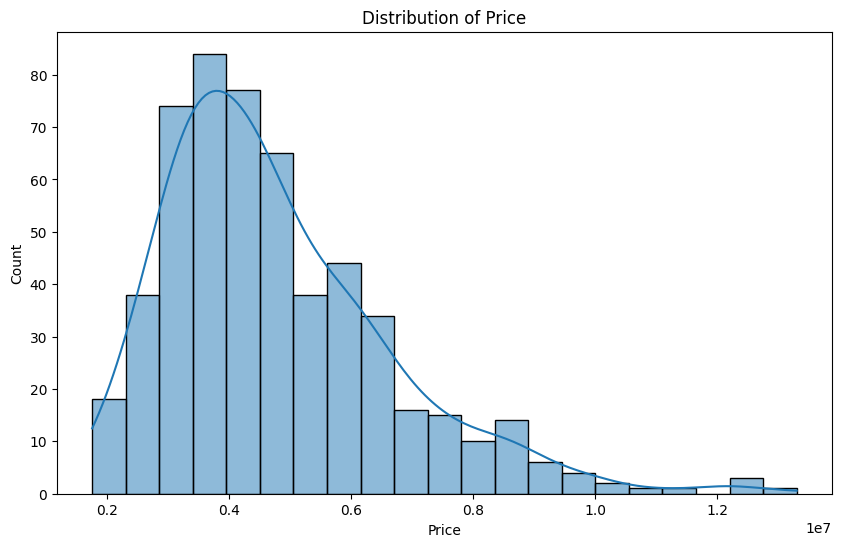

In [8]:
# Plot the distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

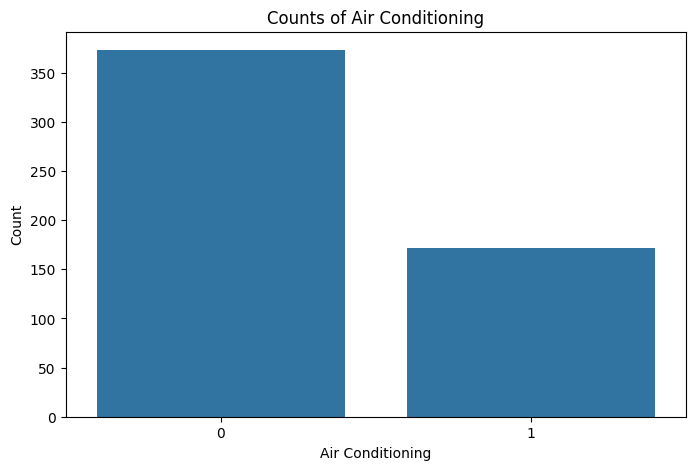

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(x='airconditioning', data=data)
plt.title('Counts of Air Conditioning')
plt.xlabel('Air Conditioning')
plt.ylabel('Count')
plt.show()

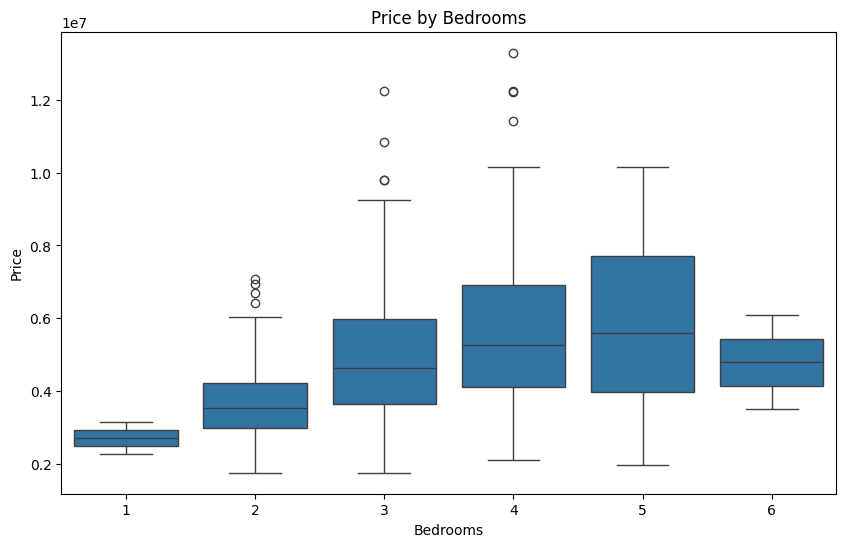

In [10]:
 # Relationship between 2 features
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=data)
plt.title('Price by Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

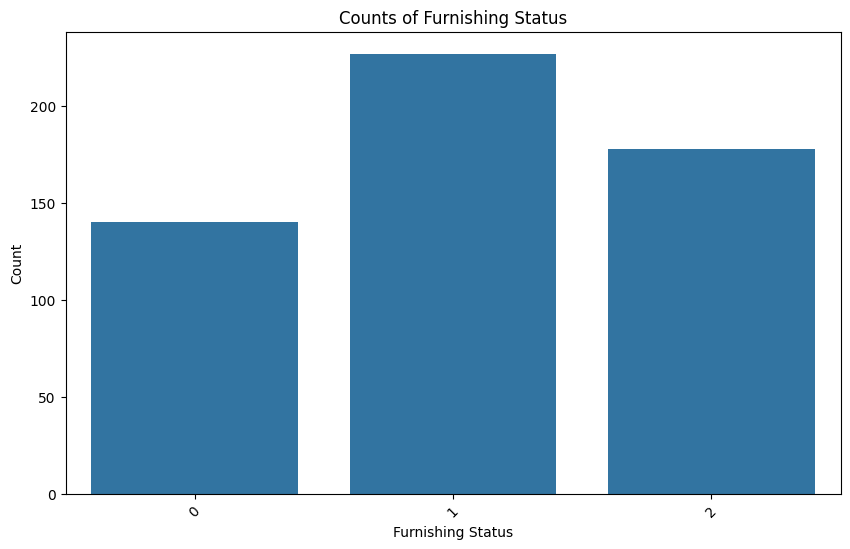

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='furnishingstatus', data=data)
plt.title('Counts of Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

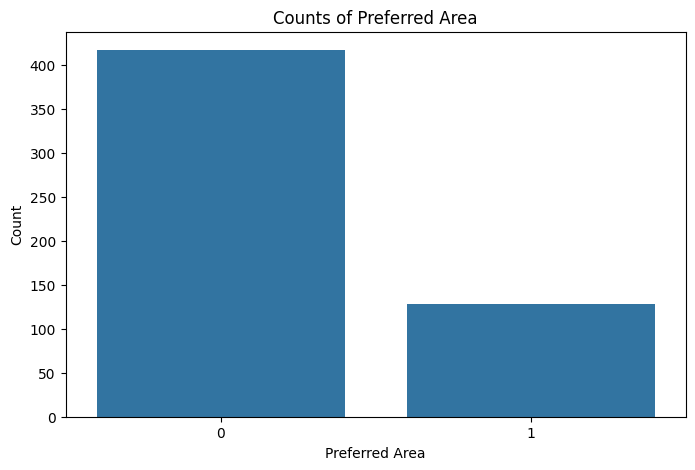

In [12]:
# Example for 'prefarea' variable
plt.figure(figsize=(8, 5))
sns.countplot(x='prefarea', data=data)
plt.title('Counts of Preferred Area')
plt.xlabel('Preferred Area')
plt.ylabel('Count')
plt.show()

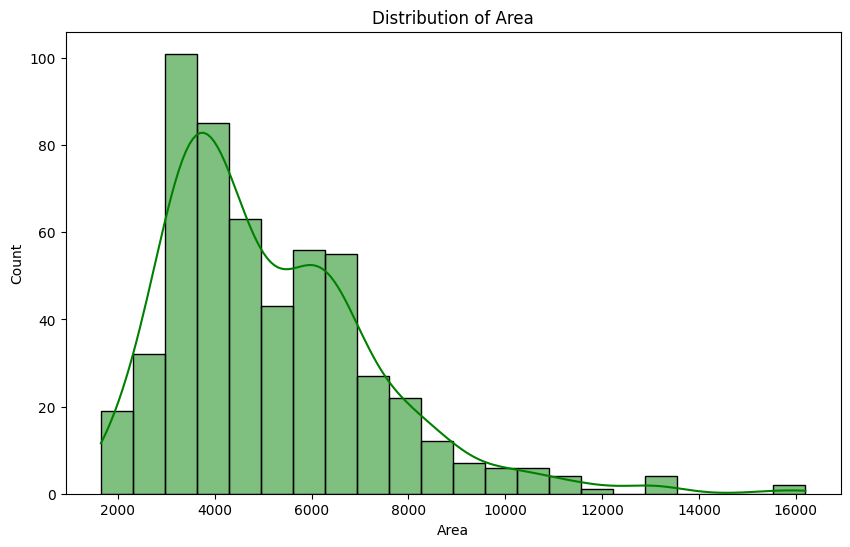

In [13]:
# Example for 'area' variable
plt.figure(figsize=(10, 6))
sns.histplot(data['area'], kde=True, color='green')
plt.title('Distribution of Area')
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()

\

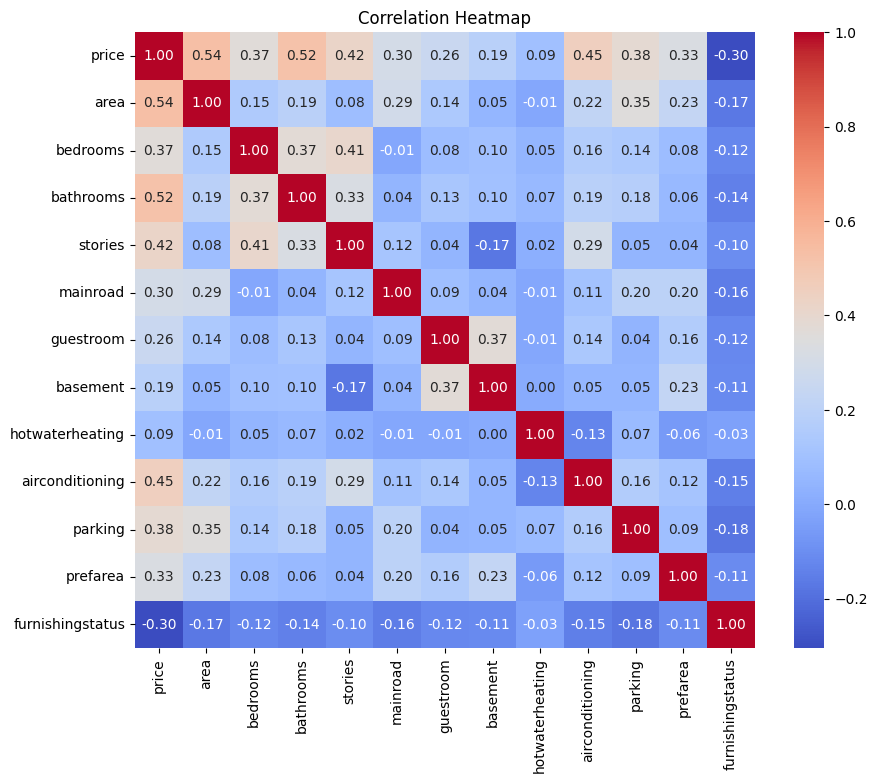

In [14]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8)) # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Display the plot
plt.title("Correlation Heatmap")
plt.show()

**4: Define the Neural Network Architecture**

We will define a simple feedforward neural network with:
- Input layer
- Two hidden layers
- Output layer

Activation functions like ReLU will be used for the hidden layers.

### Equation for the First Layer:

The output from the first layer is a linear combination of the input features:

$$
z_1 = w_1 x_1 + w_2 x_2 + w_3 x_3 + b
$$

Where:
- \(x_1\), \(x_2\), and \(x_3\) are the input features (e.g., area, bedrooms, bathrooms).
- \(w_1\), \(w_2\), and \(w_3\) are the weights learned by the model.
- \(b\) is the bias term learned by the model.

After the activation function, the output is:

$$
a_1 = \text{ReLU}(z_1)
$$

This is the process for each layer, where the output of each layer becomes the input to the next layer.


In [15]:
# Define the neural network
class HousePriceModel(nn.Module):
    def __init__(self, input_size):
        super(HousePriceModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)  # First hidden layer
        self.fc2 = nn.Linear(128, 64)          # Second hidden layer
        self.fc3 = nn.Linear(64, 32)           # Third hidden layer
        self.fc4 = nn.Linear(32, 1)            # Output layer
        self.relu = nn.ReLU()                  # Activation function

    def forward(self, x):
        x = self.relu(self.fc1(x))             # First layer + activation
        x = self.relu(self.fc2(x))             # Second layer + activation
        x = self.relu(self.fc3(x))             # Third layer + activation
        x = self.fc4(x)                        # Output layer (no activation here)
        return x

# Initialize the model
input_size = X_train.shape[1]  # Number of features
model = HousePriceModel(input_size)

print(model)  # Display the model architecture


HousePriceModel(
  (fc1): Linear(in_features=12, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
)


### Loss Function and Optimizer

1. **Loss Function**: We use the Mean Squared Error (MSE) loss function, which is suitable for regression problems.  

   Formula:

   $$
   \text{MSE} = \frac{1}{N} \sum_{i=1}^N (\hat{y}_i - y_i)^2
   $$

   Here, \( \hat{y}_i \) is the predicted value, and \( y_i \) is the true value.

2. **Optimizer**: The Adam optimizer is used to update the model's parameters based on the gradients calculated during backpropagation.


In [16]:
# Define the loss function (Mean Squared Error)
criterion = nn.MSELoss()

# Define the optimizer (Adam Optimizer)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


### Training the Model

1. **Forward Pass**: Pass the input data through the model to get predictions.
2. **Compute Loss**: Calculate the error between predicted and actual house prices.
3. **Backward Pass**: Compute gradients using backpropagation.
4. **Update Weights**: Adjust model parameters using the optimizer.

We repeat these steps for multiple **epochs** to train the model.

---

### Training Loop
- Number of epochs: \( = 100 \)
- Batch size: \( = 32 \) (optional)

Below is the training loop implementation.


In [17]:
# Training loop
epochs = 8000
for epoch in range(epochs):
    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass
    predictions = model(X_train)

    # Compute loss
    loss = criterion(predictions, y_train)

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [10/8000], Loss: 25234788843520.0000
Epoch [20/8000], Loss: 25234784649216.0000
Epoch [30/8000], Loss: 25234769969152.0000
Epoch [40/8000], Loss: 25234738511872.0000
Epoch [50/8000], Loss: 25234675597312.0000
Epoch [60/8000], Loss: 25234558156800.0000
Epoch [70/8000], Loss: 25234348441600.0000
Epoch [80/8000], Loss: 25234002411520.0000
Epoch [90/8000], Loss: 25233450860544.0000
Epoch [100/8000], Loss: 25232609902592.0000
Epoch [110/8000], Loss: 25231380971520.0000
Epoch [120/8000], Loss: 25229631946752.0000
Epoch [130/8000], Loss: 25227205541888.0000
Epoch [140/8000], Loss: 25223929790464.0000
Epoch [150/8000], Loss: 25219592880128.0000
Epoch [160/8000], Loss: 25213970415616.0000
Epoch [170/8000], Loss: 25206808641536.0000
Epoch [180/8000], Loss: 25197824442368.0000
Epoch [190/8000], Loss: 25186717925376.0000
Epoch [200/8000], Loss: 25173157740544.0000
Epoch [210/8000], Loss: 25156791566336.0000
Epoch [220/8000], Loss: 25137225138176.0000
Epoch [230/8000], Loss: 25114011762688.00

In [18]:
# Evaluate the model on the test set
model.eval()  # Set the model to evaluation mode (disables gradient computation)
with torch.no_grad():
    test_predictions = model(X_test)
    test_loss = criterion(test_predictions, y_test)

print(f"Test Loss (MSE): {test_loss.item():.4f}")


Test Loss (MSE): 1839554756608.0000


In [19]:
# Calculate MAPE
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming y_test and test_predictions are numpy arrays or lists
mape_value = mape(y_test.numpy(), test_predictions.numpy())
print(f"Mean Absolute Percentage Error (MAPE): {mape_value:.2f}%")

Mean Absolute Percentage Error (MAPE): 22.38%


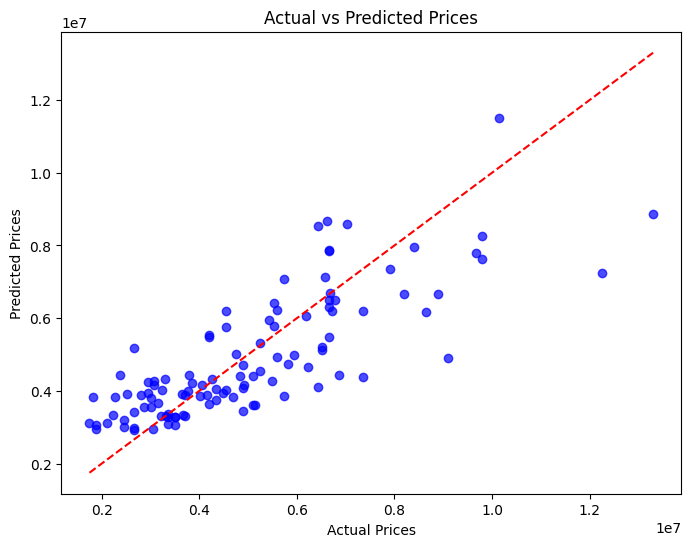

In [20]:
# Convert tensors to numpy arrays for visualization
y_test_np = y_test.numpy().flatten()
test_predictions_np = test_predictions.numpy().flatten()

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, test_predictions_np, alpha=0.7, color="blue")
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], color="red", linestyle="--")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

### Visualizing Predictions

We compare the model's predictions with the actual house prices using a scatter plot.

1. X-axis: Actual Prices
2. Y-axis: Predicted Prices

An ideal model will produce points close to the diagonal line \( y = x \).


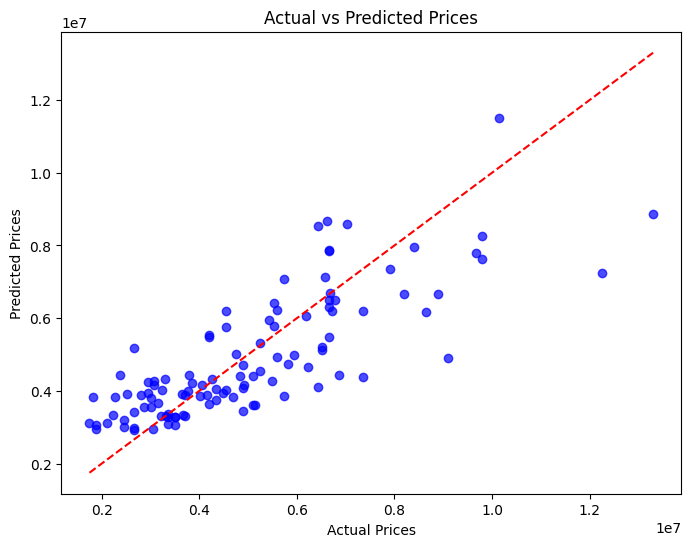

In [21]:
import matplotlib.pyplot as plt

# Convert tensors to numpy arrays for visualization
y_test_np = y_test.numpy().flatten()
test_predictions_np = test_predictions.numpy().flatten()

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, test_predictions_np, alpha=0.7, color="blue")
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], color="red", linestyle="--")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


In [22]:
# Save the model
torch.save(model.state_dict(), "house_price_model.pth")

# Load the model
loaded_model = HousePriceModel(input_size)
loaded_model.load_state_dict(torch.load("house_price_model.pth"))
loaded_model.eval()


<ipython-input-22-3725f896adf6>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load("house_price_model.pth"))


HousePriceModel(
  (fc1): Linear(in_features=12, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
)